In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('Admission_Prediction.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [5]:
data.shape

(500, 9)

In [6]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
data.isna().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [8]:
data['University Rating']=data['University Rating'].fillna(data['University Rating'].mode()[0])
data['TOEFL Score']=data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['GRE Score']=data['GRE Score'].fillna(data['GRE Score'].mean())

In [11]:
data.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [10]:
data=data.drop(columns=['Serial No.'])
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


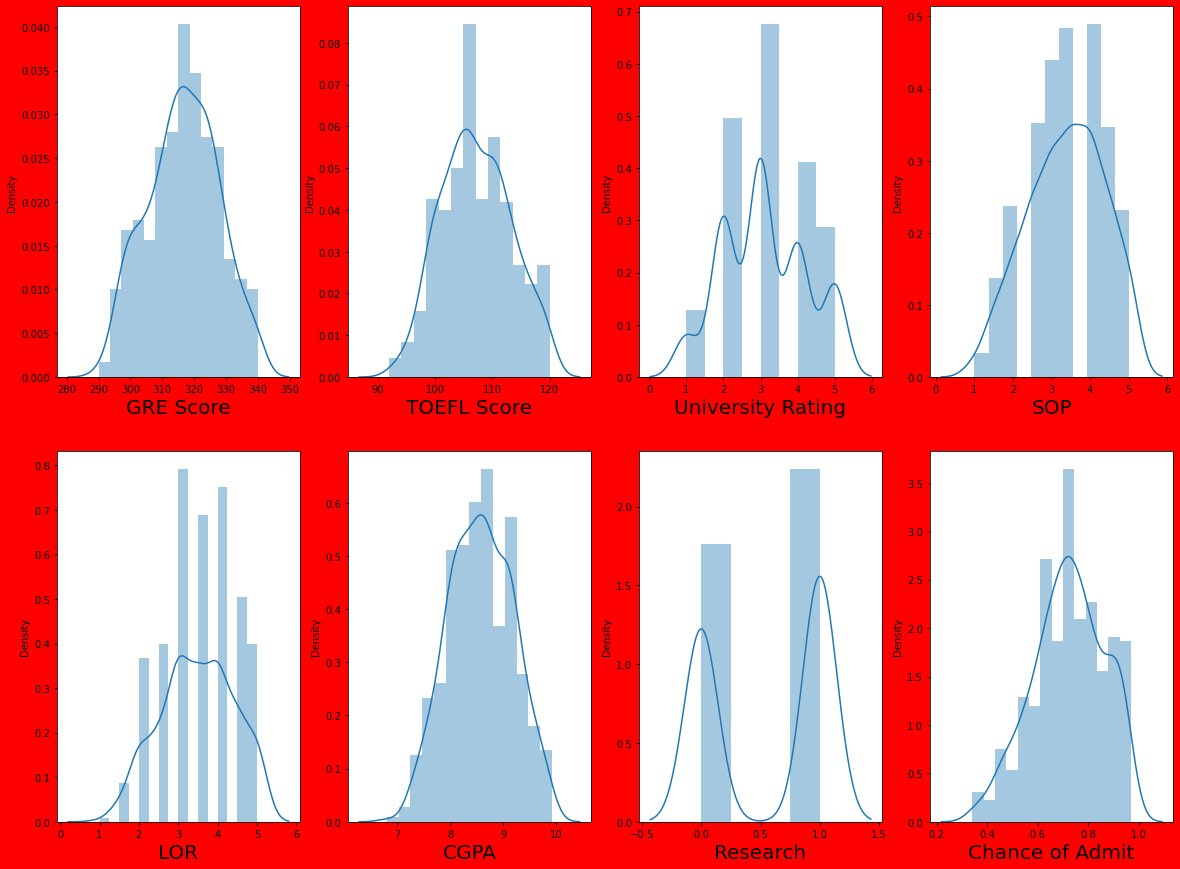

In [12]:
plt.figure(figsize=(20,15),facecolor='red')
plotnumber=1
for column in data:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [13]:
y=data['Chance of Admit']
X=data.drop(columns=['Chance of Admit'])

In [14]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [16]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1
496,337.000000,117.0,5.0,5.0,5.0,9.87,1
497,330.000000,120.0,5.0,4.5,5.0,9.56,1
498,312.000000,103.0,4.0,4.0,5.0,8.43,0


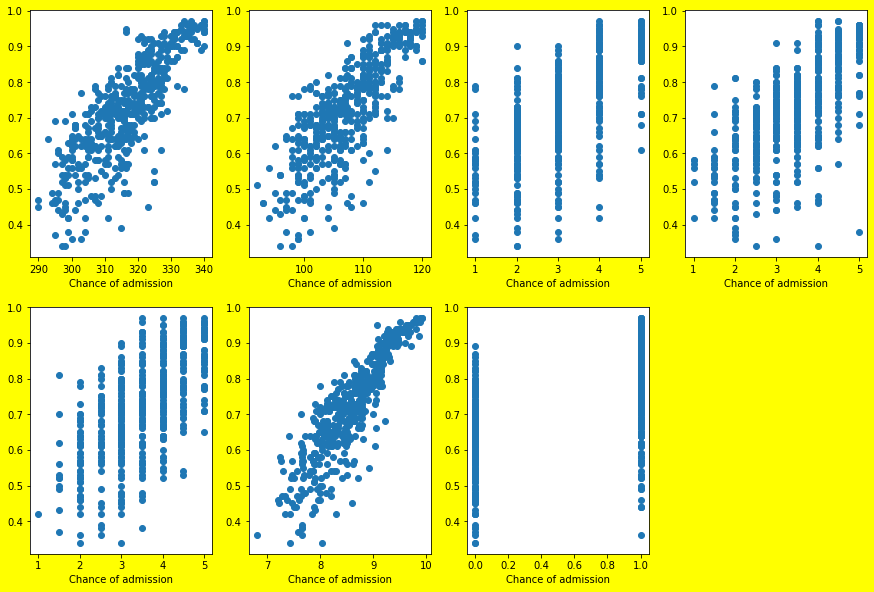

In [18]:
plt.figure(figsize=(15,10),facecolor='yellow')
plotnumber=1
for column in X:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel('Chance of admission',fontsize=10)
        
    plotnumber+=1
plt.show()

In [19]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [20]:
X_scaled

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [21]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=.25,random_state=49)
y_train.head()

401    0.66
221    0.75
110    0.61
76     0.74
195    0.78
Name: Chance of Admit, dtype: float64

In [22]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [23]:
data.tail(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
498,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [27]:
print('chance of admission is :',regression.predict(scaler.transform([[327.0,113.0,4.0,4.5,4.5,9.04,0]])))

chance of admission is : [0.82582913]


In [28]:
regression.score(x_train,y_train)

0.8145910304382725

In [29]:
regression.score(x_test,y_test)

0.8377796652353542

In [30]:
y_pred=regression.predict(x_test)

In [31]:
y_pred

array([0.77592728, 0.82189355, 0.53237459, 0.53158915, 0.71913576,
       0.78296644, 0.67493981, 0.71765858, 0.95026714, 0.51343088,
       0.82749034, 0.65490214, 0.65336809, 0.69515263, 0.67870849,
       0.68422187, 0.77066709, 0.69587358, 0.61306985, 0.91270759,
       0.83613353, 0.5101666 , 0.62095565, 0.90970737, 0.67081486,
       0.91154893, 0.52166984, 0.61229555, 0.85070914, 0.83034104,
       0.50493884, 0.73415525, 0.76966228, 0.61102598, 0.79870804,
       0.58112644, 0.75399139, 0.84620015, 0.86249992, 0.75216791,
       0.65235971, 0.96012442, 0.66118549, 0.6427768 , 0.6556939 ,
       0.50748275, 0.68440277, 0.61035881, 0.51200968, 0.73397561,
       0.76162862, 0.89663454, 0.58197652, 0.9320727 , 0.59682293,
       0.71741367, 0.94389341, 0.76641482, 0.59803781, 0.78678587,
       0.76864083, 0.69049847, 0.74159936, 0.85564167, 0.77807617,
       0.74212136, 0.69536291, 0.73242447, 0.99167787, 0.96534931,
       0.66420324, 0.65200556, 0.75069108, 0.73163753, 0.67942

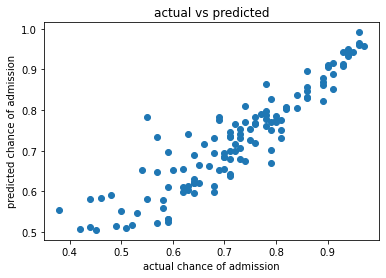

In [32]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual chance of admission')
plt.ylabel('predicted chance of admission')
plt.title('actual vs predicted')
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [34]:
y_pred=regression.predict(x_test)

In [35]:
mean_absolute_error(y_test,y_pred)

0.03909496212445048

In [36]:
mean_squared_error(y_test,y_pred)

0.003055923796763749

In [37]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.055280410605961935